## Simple Linear Regression

In [325]:
import matplotlib.pyplot as plt 

In [326]:
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]

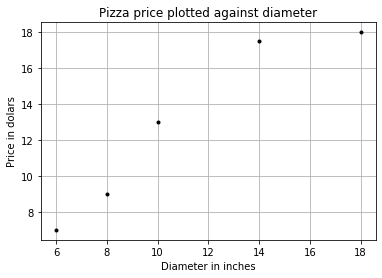

In [327]:
plt.figure()
plt.title("Pizza price plotted against diameter")
plt.xlabel("Diameter in inches")
plt.ylabel("Price in dolars")
plt.plot(X, y ,"k.")
plt.grid(True)
plt.show()

In [328]:
from sklearn.linear_model import LinearRegression 

In [329]:
# Training data
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]

In [330]:
#  Create and fit model
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [331]:
print('A 12 " pizza should cost. $%.2f' % model.predict([[12]])[0])
print('A 10 " pizza should cost. $%.2f' % model.predict([[10]])[0])

A 12 " pizza should cost. $13.68
A 10 " pizza should cost. $11.73


In [332]:
print("The fit method of LinearRegression learns the parameters of the following model for simple linear regression:")
print(f" y = {model.intercept_} + {model.coef_} * X")

The fit method of LinearRegression learns the parameters of the following model for simple linear regression:
 y = [1.96551724] + [[0.9762931]] * X


In [333]:
print('A 8 " pizza should cost. $%.2f' % model.predict([[8]])[0])
print('A 20 " pizza should cost. $%.2f' % model.predict([[20]])[0])

A 8 " pizza should cost. $9.78
A 20 " pizza should cost. $21.49


## Evaluating the fitness of a model with a cost funciton

In [334]:
# How can assess which parameters produced the best-fitting regression line?

In [335]:
import numpy as np

In [336]:
print(f"Residual sum of squares : {np.mean((model.predict(X) - y)) ** 2}")

Residual sum of squares : 1.2621774483536191e-31


In [337]:
print("Resiaul sum of squares: %.5s " % (np.mean(model.predict(X) - y) ** 2))

Resiaul sum of squares: 1.262 


## Solving ordinary least squares for simple linear regression

In [338]:
from __future__ import division

In [339]:
# Varianca is a measure of how for a set of values is spread out.

In [340]:
xbar = (6 + 8 + 10 + 14 + 18) / 5

variance = ((6 - xbar)**2 + (8 - xbar)**2 + (10 - xbar)**2 + (14 - xbar)**2 + (18 - xbar)**2) / 4

In [341]:
print("variance = %s" % variance)

variance = 23.2


In [342]:
# Covariance is a measure of how much two veriables change together.

In [343]:
xbar = (6 + 8 + 10 + 14 + 18) / 5
ybar = (7 + 9 + 13 + 17.5 + 18) / 5

cov = ((6-xbar)*(7-ybar) + (8-xbar)*(9-ybar) + (10-xbar)*(13-ybar) + (14-xbar)*(17.5-ybar) + (18-xbar)*(18-ybar)) / 4

In [344]:
print("Covariance = %s" % cov)

Covariance = 22.65


## Evulating the model 

In [345]:
## r-squared
## The score method of LinearRegression returns the model's r-squared value, as seen in the following example.

In [346]:
from sklearn.linear_model import LinearRegression

In [347]:
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]

X_test = [[8], [9], [11], [16], [12]]
y_test = [[11], [8.5], [15], [18], [11]]

In [348]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [349]:
print('R-squared:',model.score(X_test, y_test))

R-squared: 0.6620052929422553


## Multiple linear regression

In [350]:
from numpy import dot, transpose
from scipy.linalg import inv

In [351]:
X = [[1, 6, 2], [1, 8,1], [1, 10, 0], [1,14,2], [1,18,0]]
y = [[7], [9], [13], [17.5], [18]]

In [352]:
print(dot(inv(dot(transpose(X), X)), dot(transpose(X), y)))

[[1.1875    ]
 [1.01041667]
 [0.39583333]]


In [353]:
from sklearn.linear_model import LinearRegression

In [354]:
X = [[6,2], [8,1], [10,0], [14,2], [18,0]]
y = [[7], [9], [13], [17.5], [18]]

In [355]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [356]:
X_test = [[8,2], [9,0], [11,2], [16,2], [12,0]]
y_test = [[11], [8.5], [15], [18], [11]]

In [357]:
predictions = model.predict(X_test)

In [358]:
for pred, predictions in enumerate(predictions):
    
    print('Predicted: %s, Target: %s '% (predictions, y_test[pred]))
    print('R-squared:', model.score(X_test, y_test))

Predicted: [10.0625], Target: [11] 
R-squared: 0.7701677731318468
Predicted: [10.28125], Target: [8.5] 
R-squared: 0.7701677731318468
Predicted: [13.09375], Target: [15] 
R-squared: 0.7701677731318468
Predicted: [18.14583333], Target: [18] 
R-squared: 0.7701677731318468
Predicted: [13.3125], Target: [11] 
R-squared: 0.7701677731318468


#### What if relationship between these explanatory variables and the response variable is not linear in the real world?

## Polynomial regression

In [359]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [360]:
X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]

In [361]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [362]:
xx = np.linspace(0,26,100)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))

In [363]:
quadratic_featurizer = PolynomialFeatures(degree= 2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.fit_transform(X_test)

In [364]:
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))

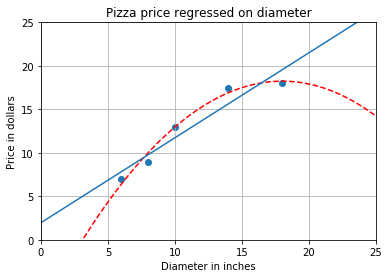

In [365]:
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c= "r", linestyle= "--") # the quadratic regression
plt.plot(xx,yy) # the simple linear regression 
plt.title("Pizza price regressed on diameter")
plt.xlabel("Diameter in inches")
plt.ylabel("Price in dollars")
plt.axis([0,25,0,25])
plt.grid(True)
plt.scatter(X_train, y_train)
plt.show()

In [366]:
# The simple linear regression model is plotted with the solid line in the following figure.
# Plotted with a dashed line, the quadratic regression model visibly fits the training data better.

In [367]:
X_train

[[6], [8], [10], [14], [18]]

In [368]:
X_train_quadratic

array([[  1.,   6.,  36.],
       [  1.,   8.,  64.],
       [  1.,  10., 100.],
       [  1.,  14., 196.],
       [  1.,  18., 324.]])

In [369]:
X_test

[[6], [8], [11], [16]]

In [370]:
X_test_quadratic

array([[  1.,   6.,  36.],
       [  1.,   8.,  64.],
       [  1.,  11., 121.],
       [  1.,  16., 256.]])

In [371]:
print("Simple linear regression r-squared: %.2f " % regressor.score(X_test, y_test))
print("Quadratic regression r-squared: %.2f" % regressor_quadratic.score(X_test_quadratic, y_test))

Simple linear regression r-squared: 0.81 
Quadratic regression r-squared: 0.87


In [372]:
## Exploring the data

In [373]:
import pandas as pd

df = pd.read_csv("winequality-red.csv", sep= ";")

In [374]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


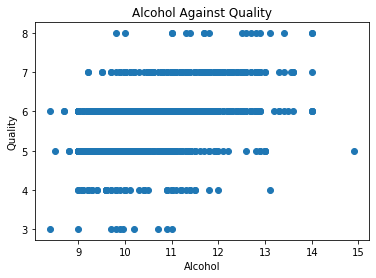

In [375]:
import matplotlib.pylab as plt 

plt.scatter(df["alcohol"], df["quality"])
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.title("Alcohol Against Quality")
plt.show()

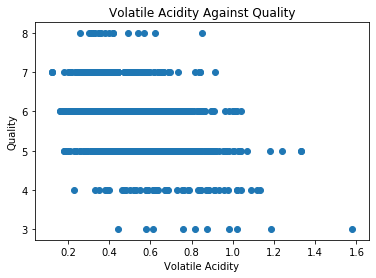

In [376]:
plt.scatter(df["volatile acidity"], df["quality"])
plt.xlabel("Volatile Acidity")
plt.ylabel("Quality")
plt.title("Volatile Acidity Against Quality")
plt.show()

In [377]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [378]:
## Fitting and evaluating the model

In [379]:
from sklearn.linear_model import LinearRegression
import pandas as pd 
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split

In [380]:
df = pd.read_csv("winequality-red.csv", sep= ";")
X = df[list(df.columns)[:-1]]
y = df["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [381]:
X.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [382]:
y.head(5)

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [383]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)
print("R-squared= %.2f" % regressor.score(X_test, y_test))

R-squared= 0.41


In [384]:
import pandas as pd 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [385]:
df = pd.read_csv("winequality-red.csv", sep= ";")
X = df[list(df.columns)[:-1]]
y = df["quality"]

In [386]:
regressor = LinearRegression()
scores = cross_val_score(regressor, X, y, cv= 5)

In [387]:
scores.mean()

0.29004162884219475

In [388]:
scores

array([0.13200871, 0.31858135, 0.34955348, 0.369145  , 0.2809196 ])

In [389]:
## Fitting models with gradient descent

In [422]:
import numpy as np
from sklearn.datasets import load_boston #Boston Housing data set
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [423]:
import warnings
warnings.filterwarnings('ignore')

In [424]:
data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

In [425]:
y_test = y_test.reshape(-1, 1)
y_train = y_train.reshape(-1,1)

In [426]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()

In [427]:
X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train)
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

In [428]:
# Next, we scaled the features using StandardScaler, which we will describe in detail in the next chapter:

regressor = SGDRegressor(loss='squared_loss')
scores = cross_val_score(regressor, X_train, y_train, cv= 5)
print("Cross validation r-squared scores= ", scores)
print("Average cross validation r-squared score=", np.mean(scores))

Cross validation r-squared scores=  [0.58020214 0.73065389 0.73660335 0.71974811 0.70674706]
Average cross validation r-squared score= 0.694790908339715


In [429]:
regressor.fit(X_train, y_train)
print("Test set r-squared score=", regressor.score(X_test, y_test))

Test set r-squared score= 0.7379891065158981
